In [6]:
import numpy as np
import matplotlib.pyplot as plt
from config import ORDER, STRAINS

In [7]:
# Load dataset
X_fn = './data/X_reference.npy'
y_fn = './data/y_reference.npy'
wavenumbers_fn = './data/wavenumbers.npy'
X = np.load(X_fn)
y = np.load(y_fn)
wavenumbers = np.load(wavenumbers_fn)
print(X.shape, y.shape)

(60000, 1000) (60000,)


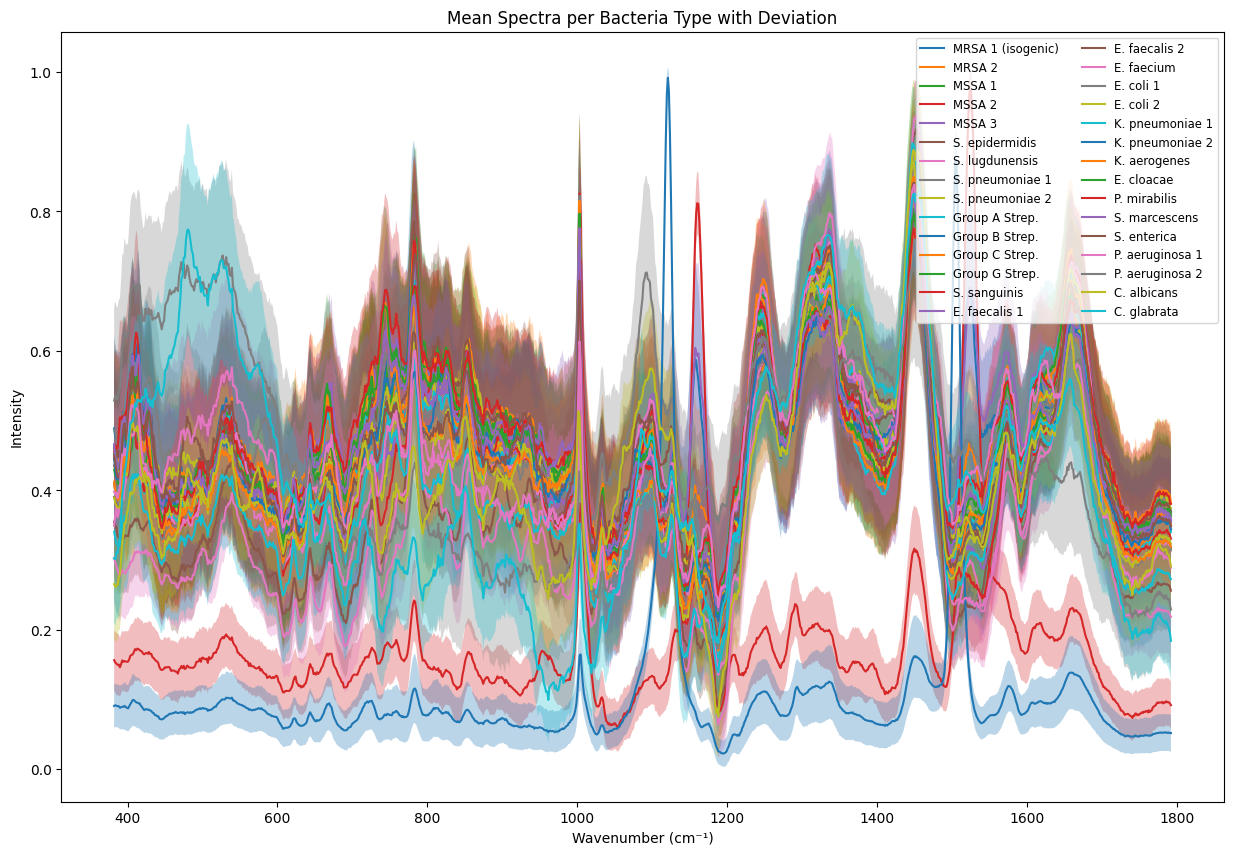

In [8]:
# Number of types of bacteria (assuming labels y correspond to indices in STRAINS)
num_bacteria_types = len(STRAINS)

# Plotting
plt.figure(figsize=(15, 10))

for i in range(num_bacteria_types):
    strain_index = ORDER[i]  # Get the strain index from the ORDER list
    strain_name = STRAINS[strain_index]  # Get the corresponding strain name
    
    # Select spectra for the current strain
    spectra = X[y == strain_index]
    
    # Calculate mean and standard deviation
    mean_spectrum = np.mean(spectra, axis=0)
    std_spectrum = np.std(spectra, axis=0)
    
    # Plot mean spectrum with shaded deviation
    plt.plot(wavenumbers, mean_spectrum, label=strain_name)
    plt.fill_between(wavenumbers, mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, alpha=0.3)

# Adding labels, legend, and title
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Mean Spectra per Bacteria Type with Deviation')
plt.legend(loc='upper right', ncol=2, fontsize='small')
plt.show()

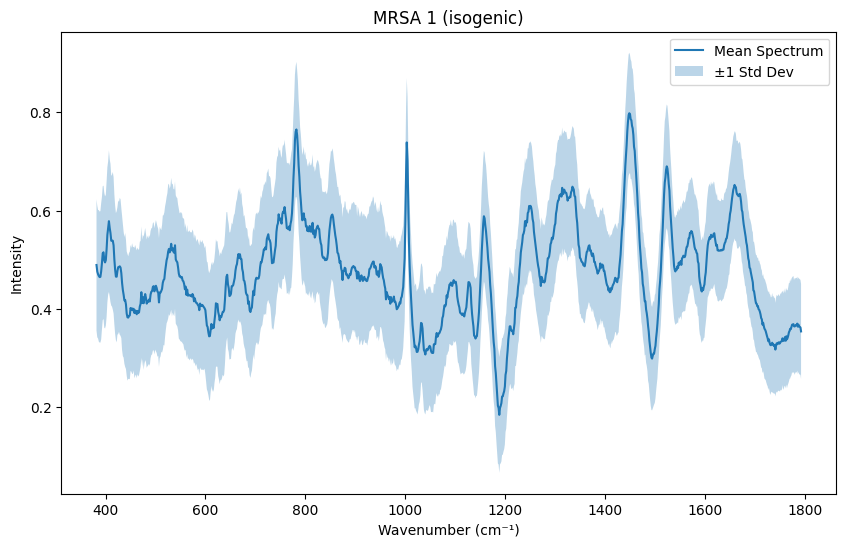

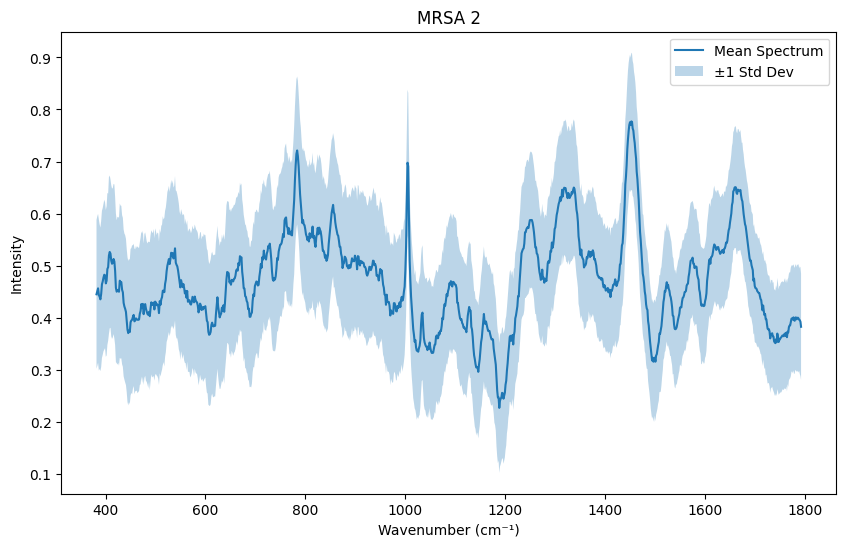

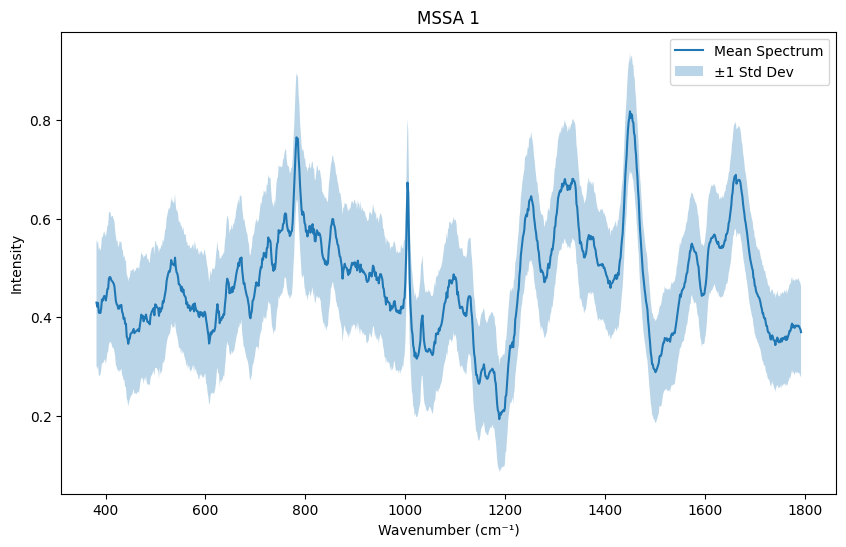

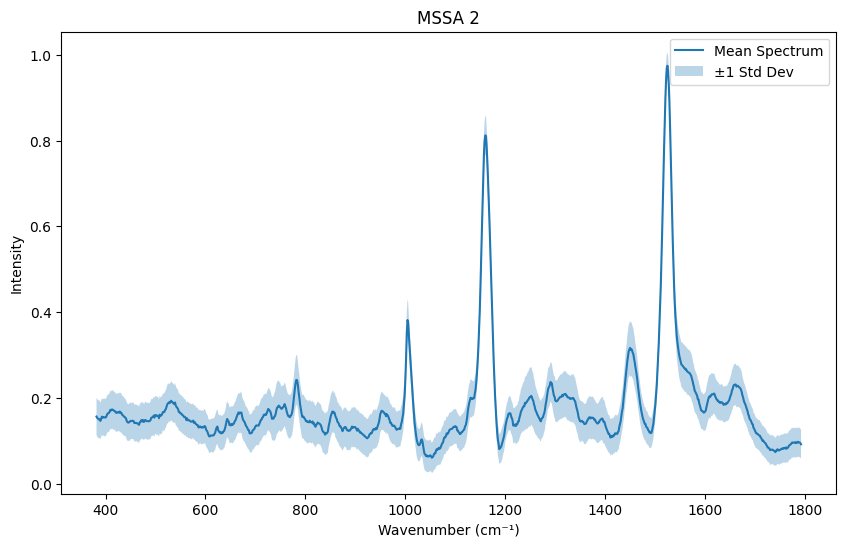

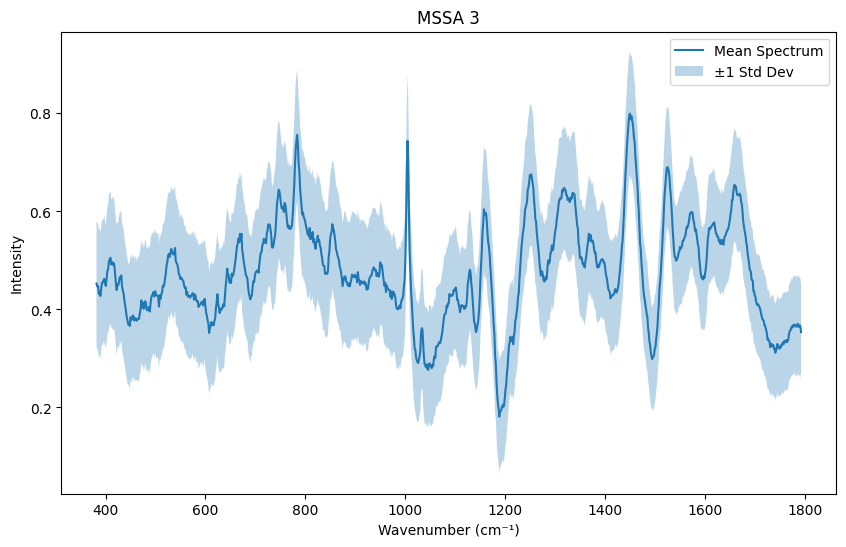

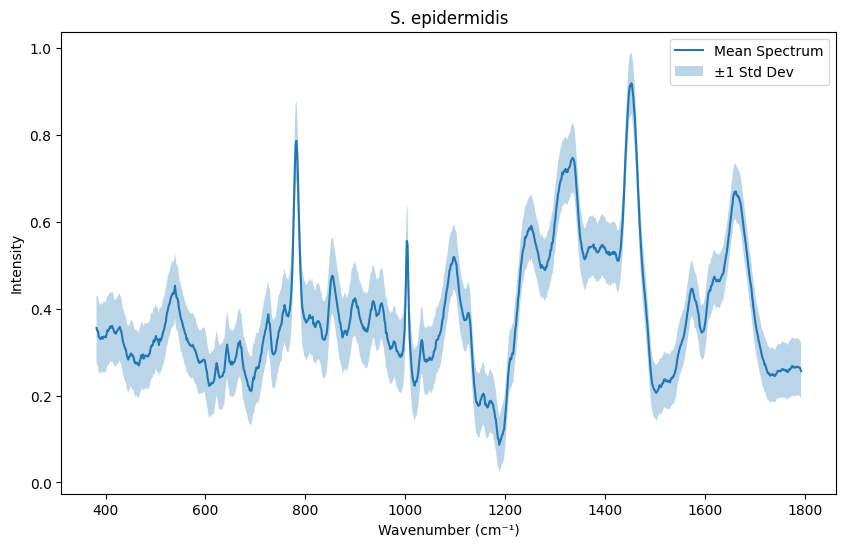

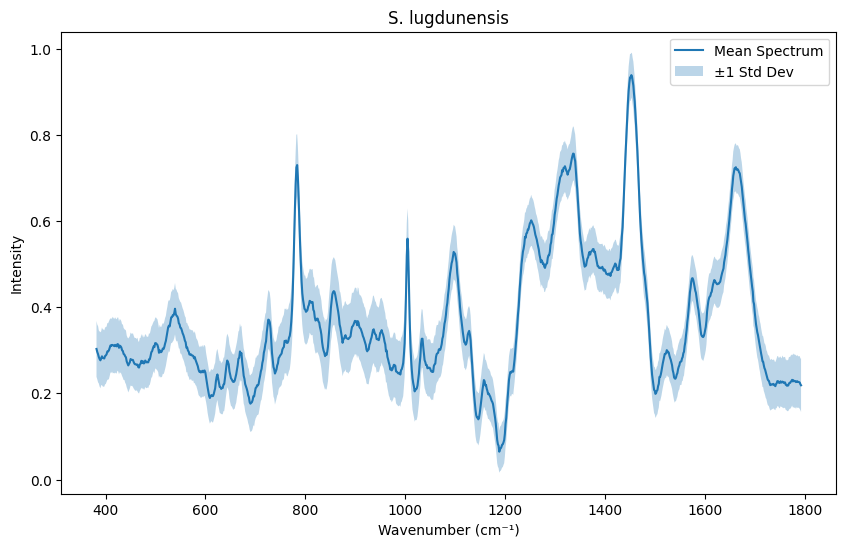

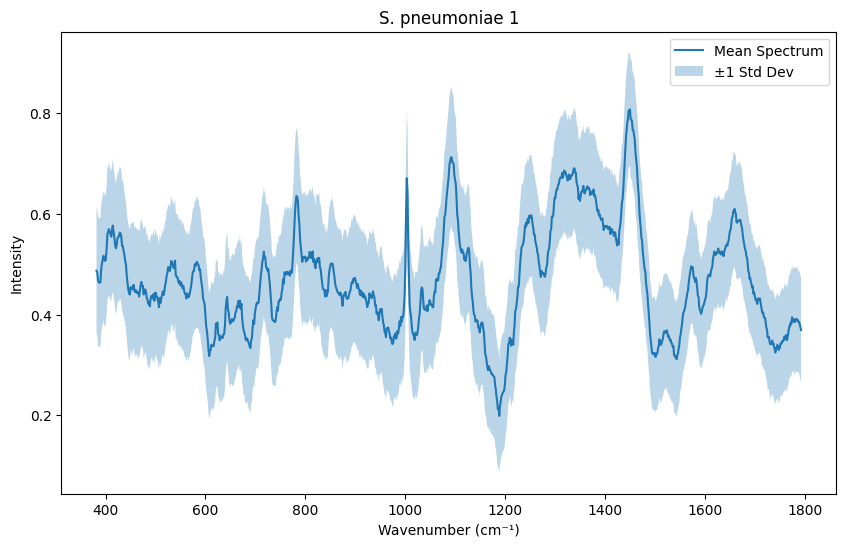

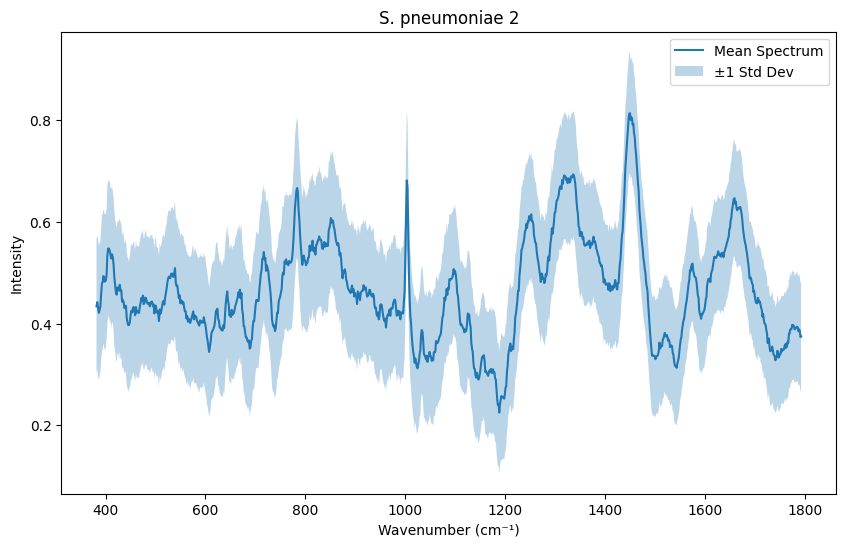

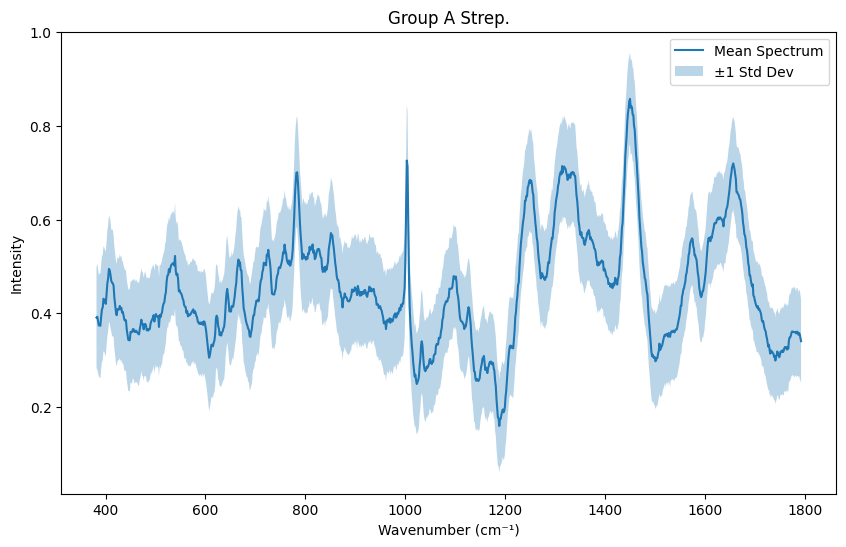

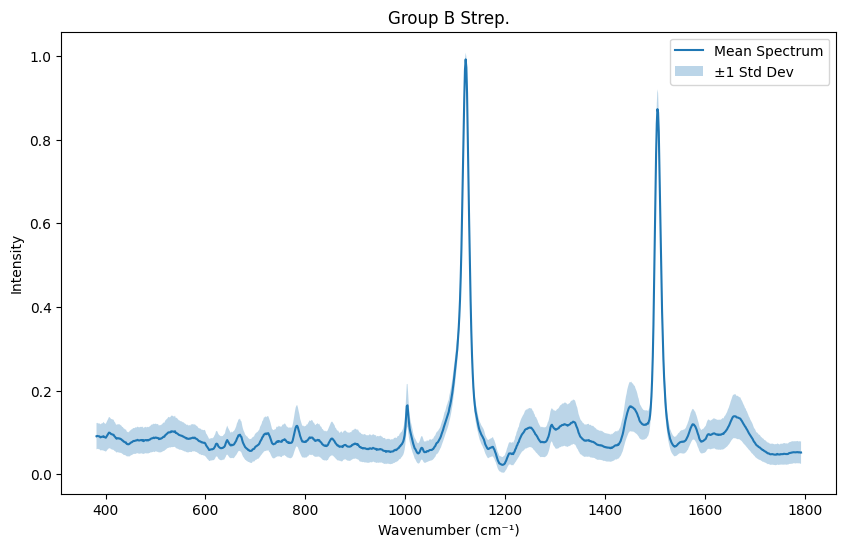

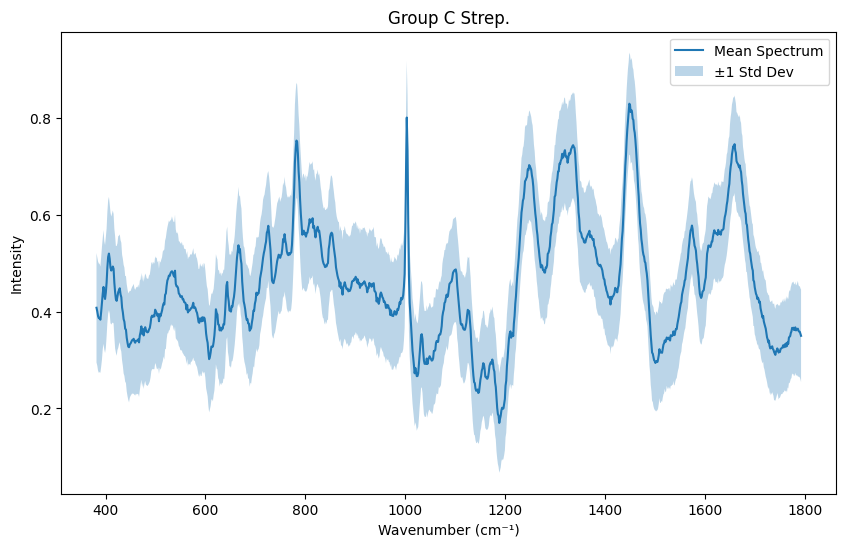

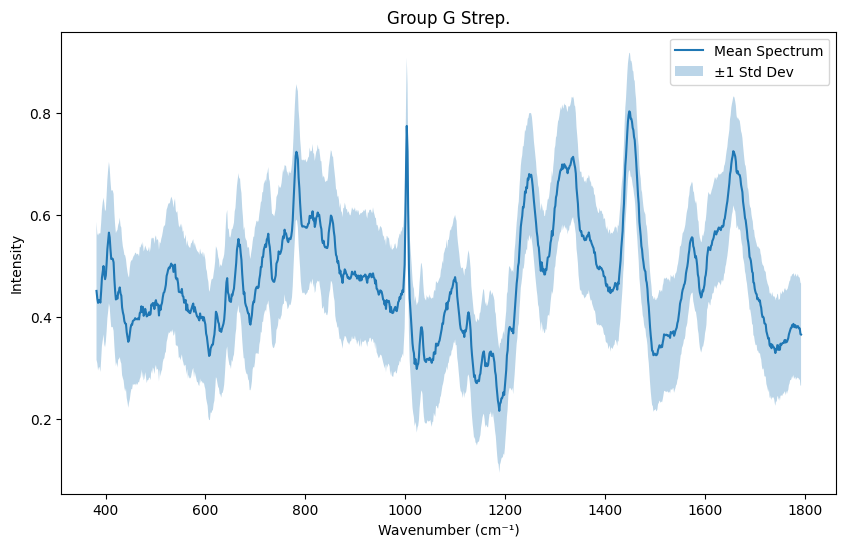

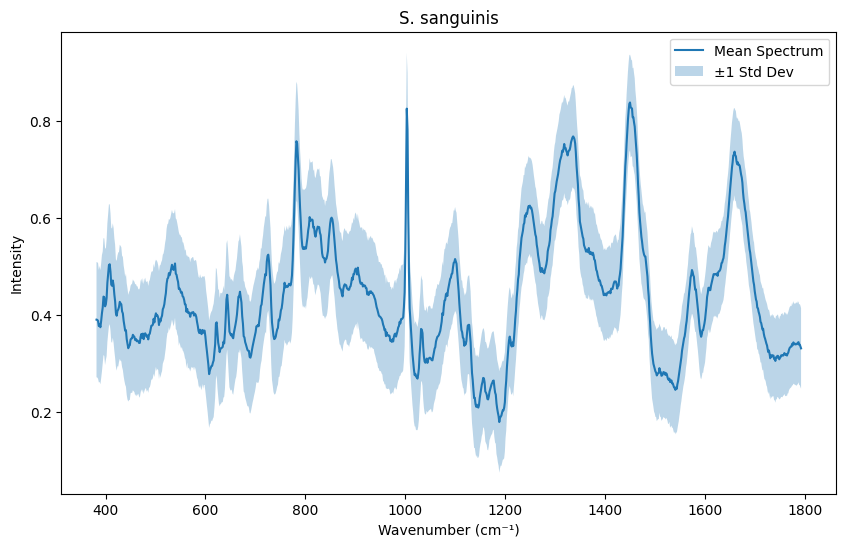

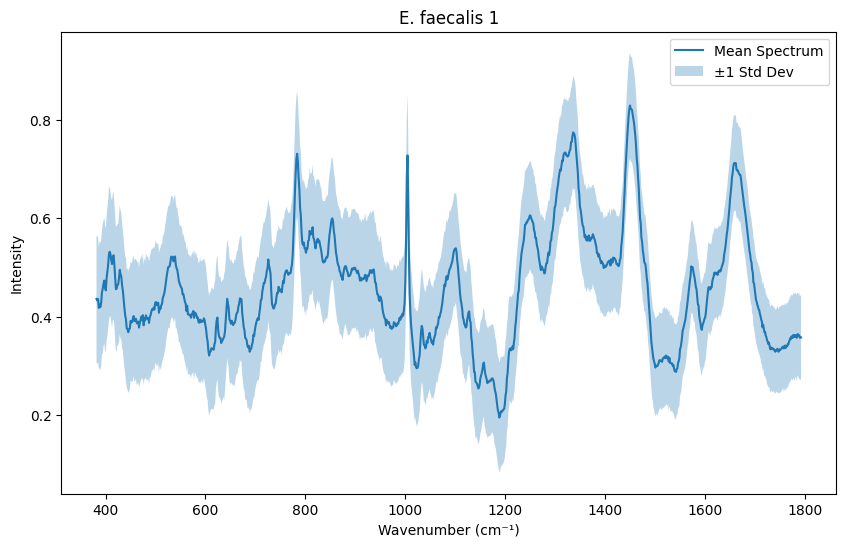

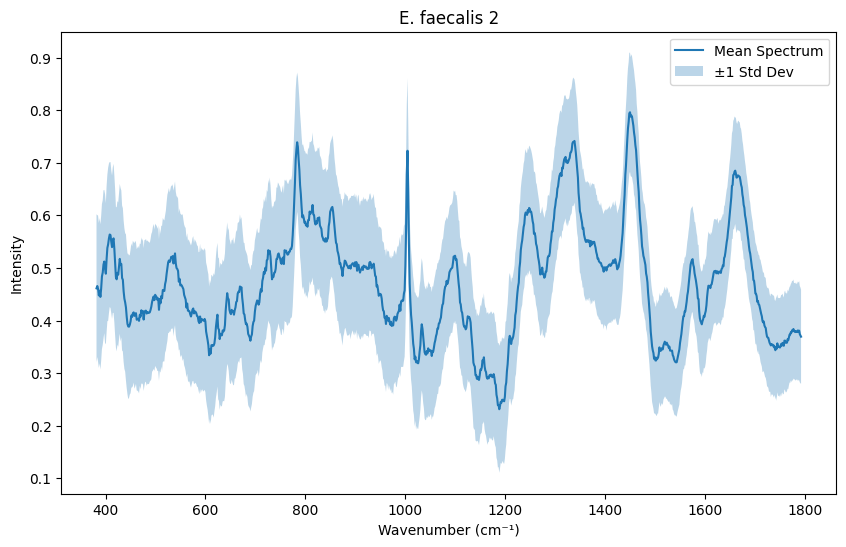

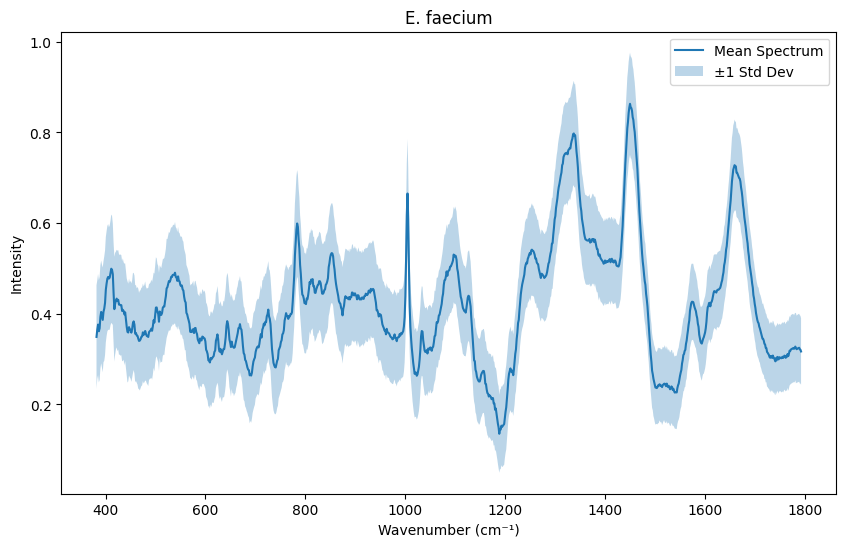

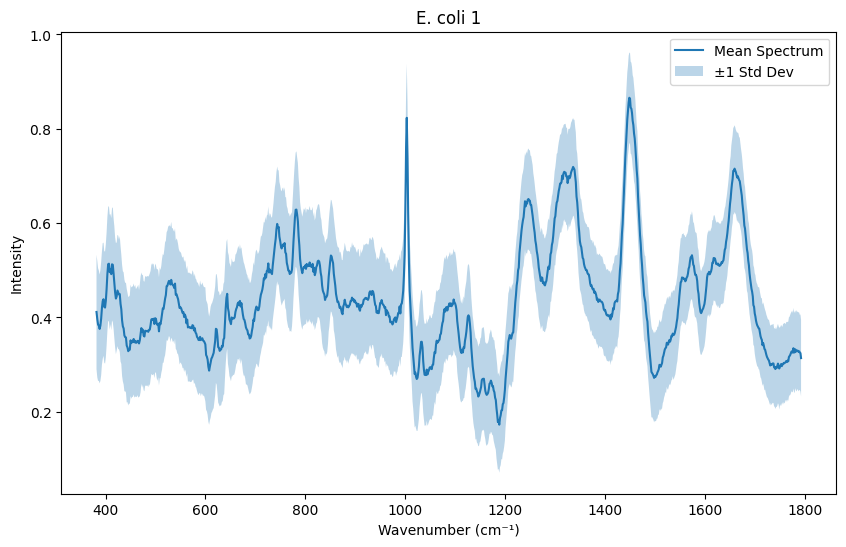

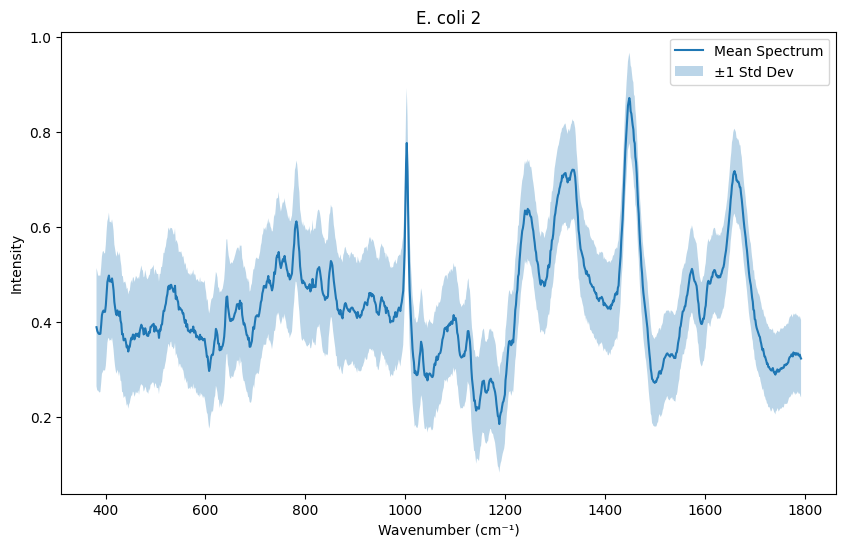

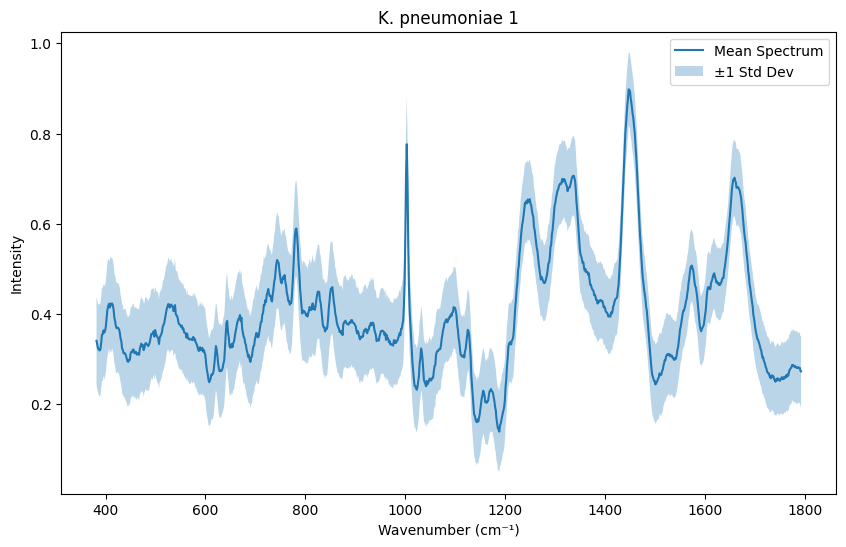

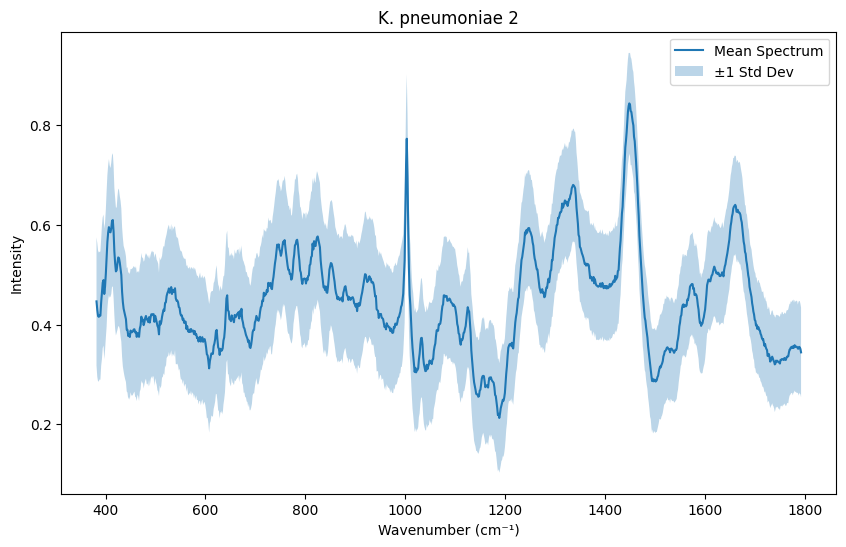

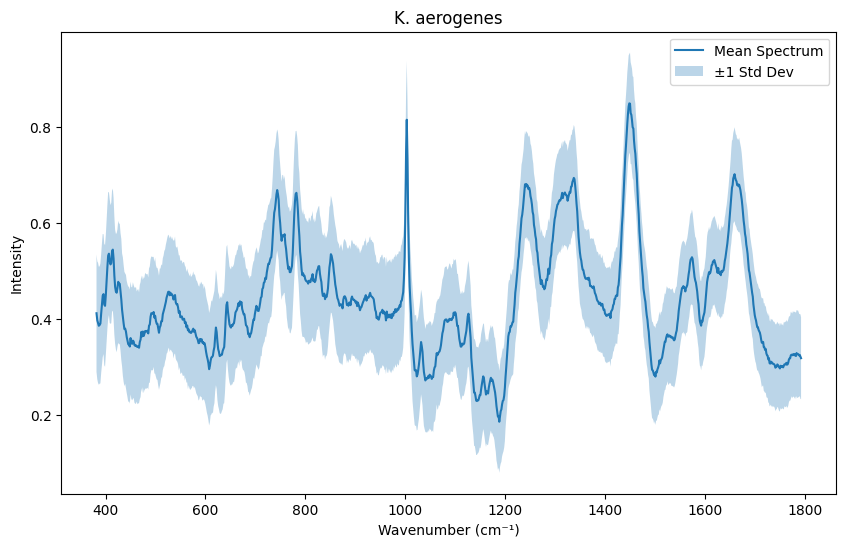

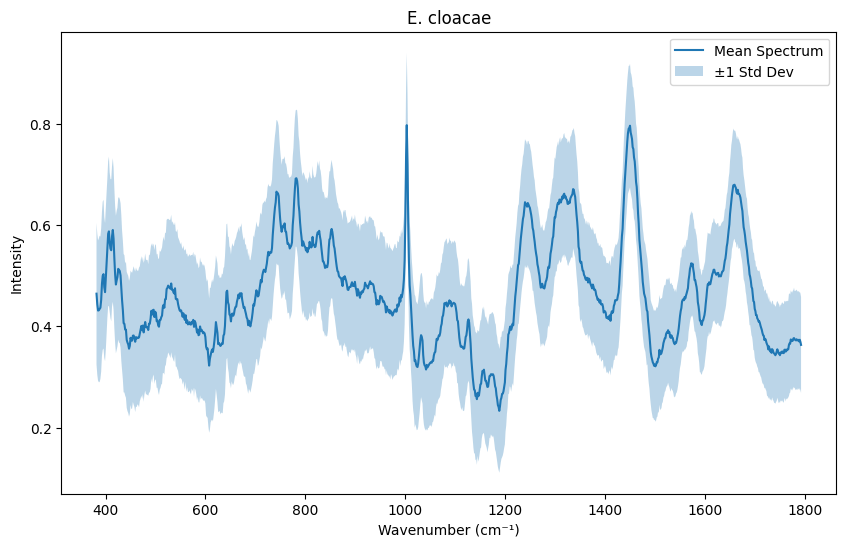

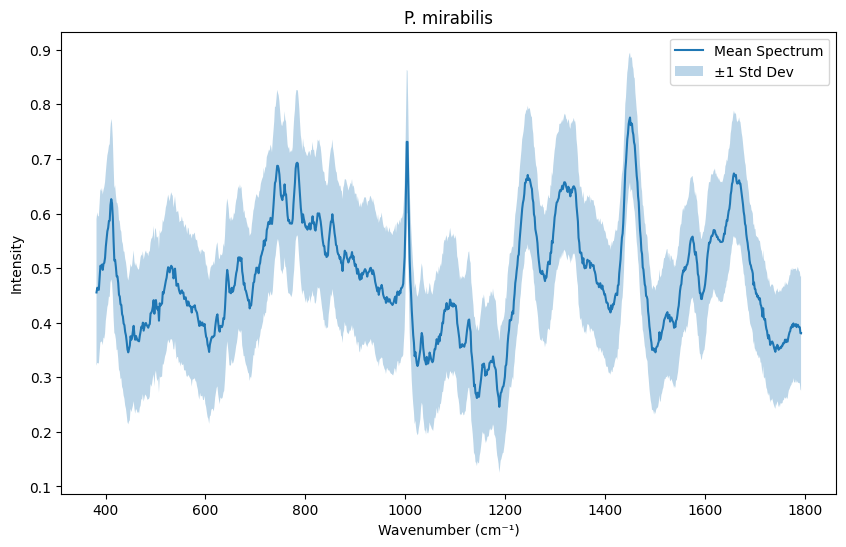

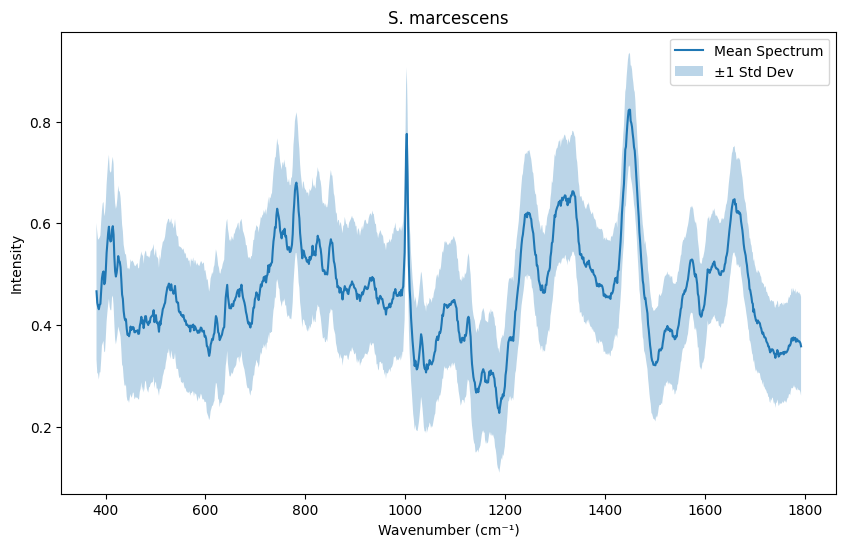

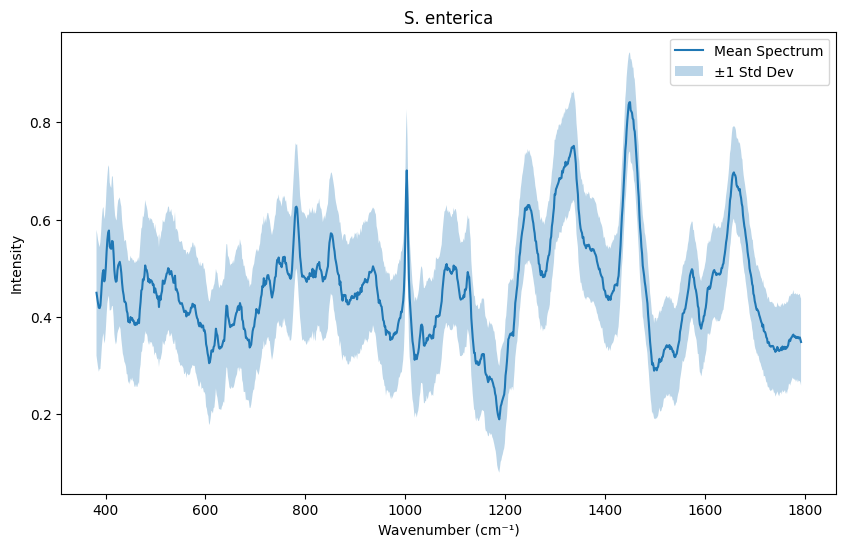

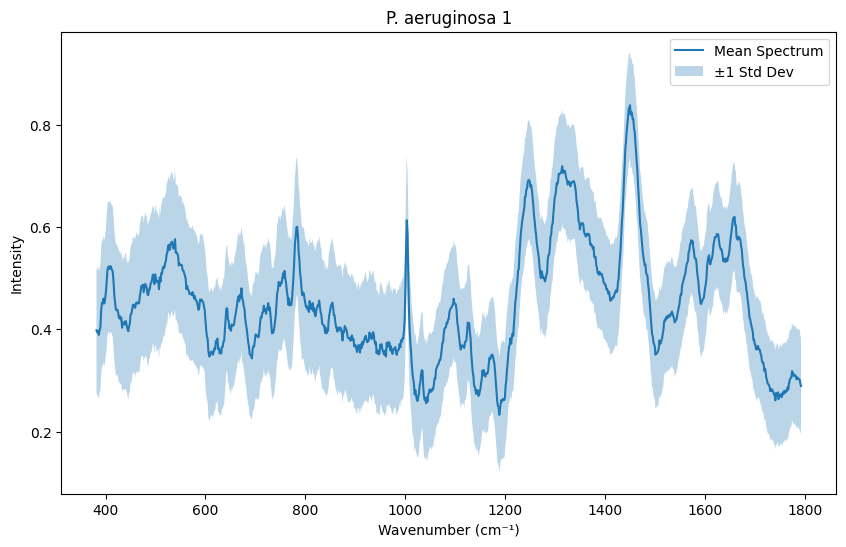

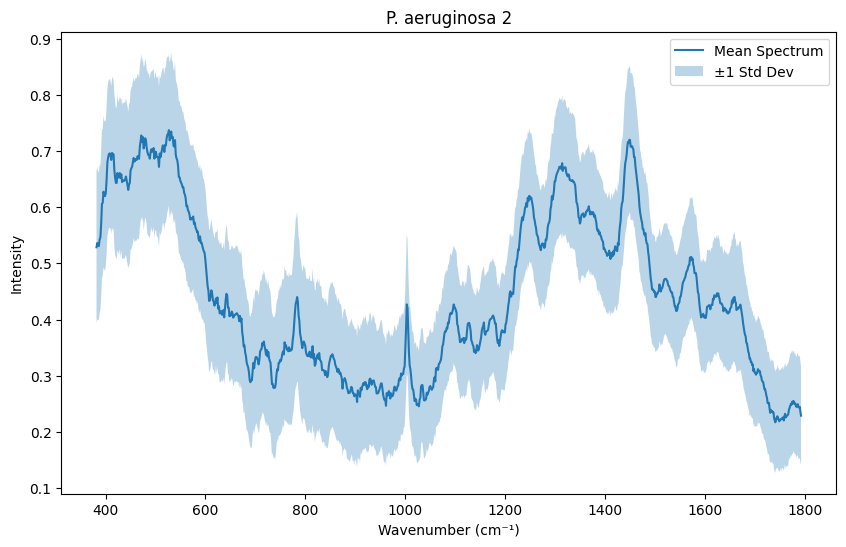

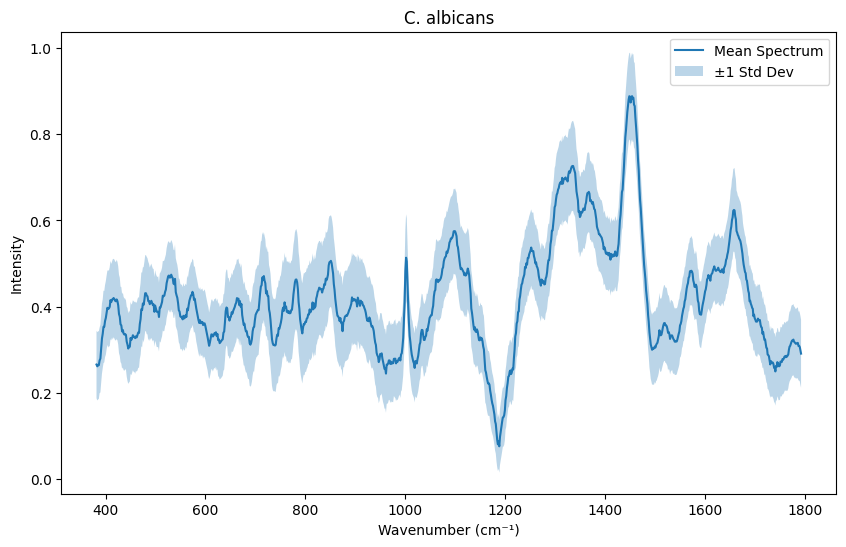

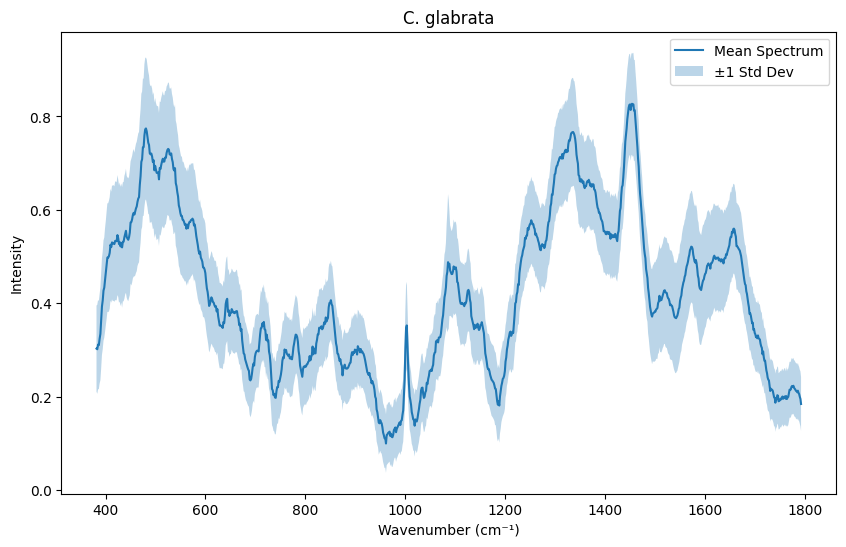

In [9]:
# Number of types of bacteria (assuming labels y correspond to indices in STRAINS)
num_bacteria_types = len(STRAINS)

# Generate individual plots
for i in range(num_bacteria_types):
    strain_index = ORDER[i]  # Get the strain index from the ORDER list
    strain_name = STRAINS[strain_index]  # Get the corresponding strain name
    
    # Select spectra for the current strain
    spectra = X[y == strain_index]
    
    # Calculate mean and standard deviation
    mean_spectrum = np.mean(spectra, axis=0)
    std_spectrum = np.std(spectra, axis=0)
    
    # Create a new figure for each strain
    plt.figure(figsize=(10, 6))
    
    # Plot mean spectrum with shaded deviation
    plt.plot(wavenumbers, mean_spectrum, label=f'Mean Spectrum')
    plt.fill_between(wavenumbers, mean_spectrum - std_spectrum, mean_spectrum + std_spectrum, alpha=0.3, label='±1 Std Dev')
    
    # Adding labels, title, and legend
    plt.xlabel('Wavenumber (cm⁻¹)')
    plt.ylabel('Intensity')
    plt.title(f'{strain_name}')
    plt.legend(loc='upper right')
    
    # Show the plot
    plt.show()

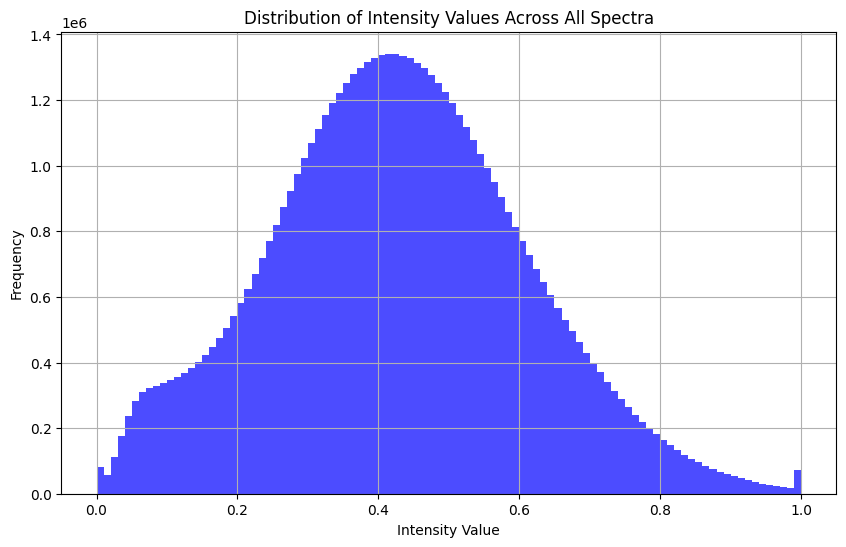

In [10]:

# Flatten the array to get all intensity values in a single array
intensity_values = X.flatten()

# Plotting the distribution of intensity values
plt.figure(figsize=(10, 6))
plt.hist(intensity_values, bins=100, color='blue', alpha=0.7)
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.title('Distribution of Intensity Values Across All Spectra')
plt.grid(True)
plt.show()

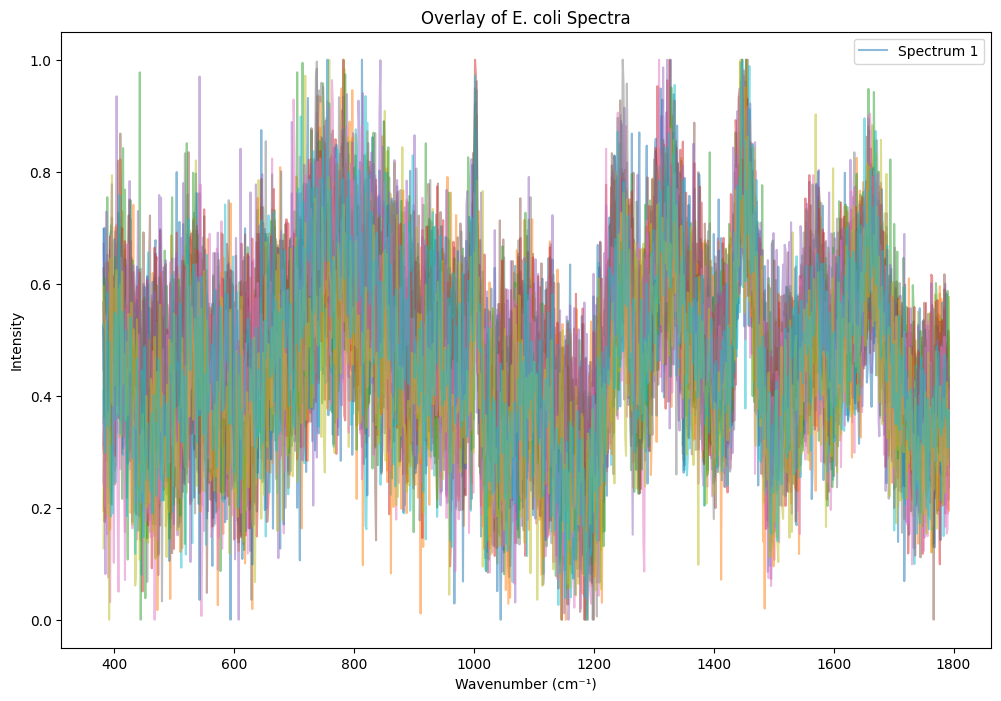

In [11]:
wavenumbers = np.load(wavenumbers_fn)

# Assuming E. coli corresponds to label 3 (E. coli 1) and 4 (E. coli 2) as per your config
ecoli_indices = np.where((y == 3) | (y == 4))

# Extract E. coli spectra
X_ecoli = X[ecoli_indices]

# Plotting overlay of multiple spectra for E. coli
plt.figure(figsize=(12, 8))

# Plotting the first 20 spectra as an example
for i in range(20):
    plt.plot(wavenumbers, X_ecoli[i], alpha=0.5, label=f'Spectrum {i+1}' if i == 0 else "")

# Adding labels, title, and legend
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Intensity')
plt.title('Overlay of E. coli Spectra')
plt.legend(loc='upper right')
plt.show()

Explained variance by PC1: 0.39
Explained variance by PC2: 0.07


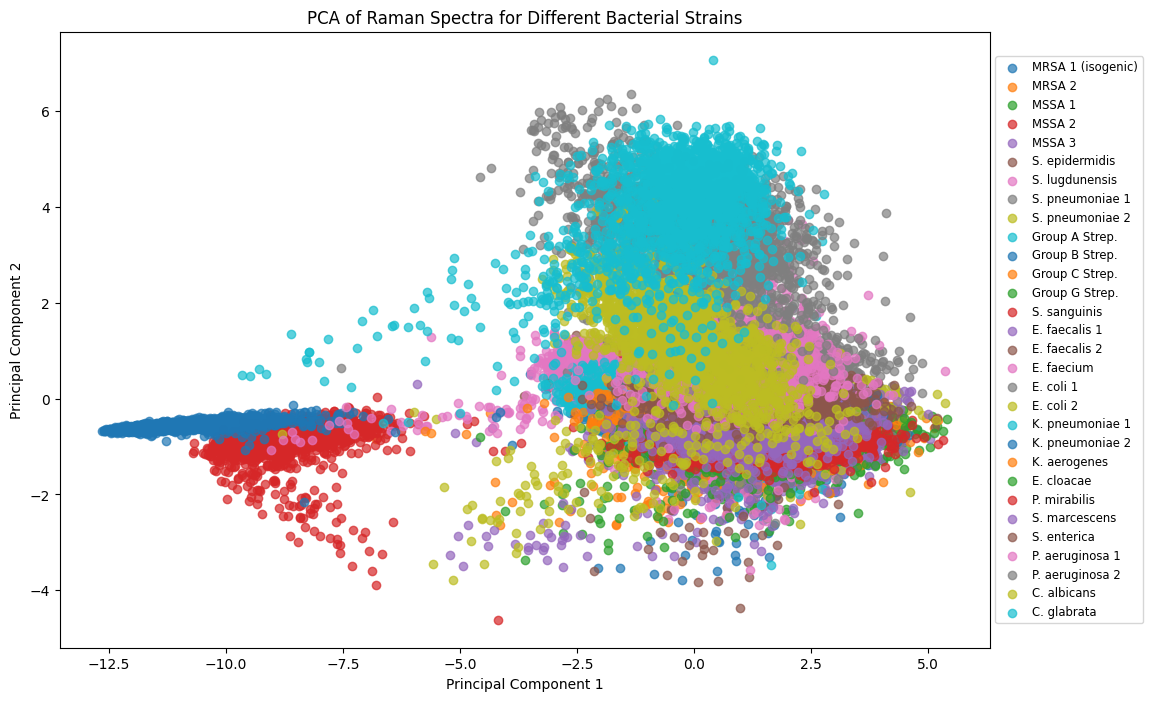

In [12]:
from sklearn.decomposition import PCA
from config import STRAINS, ORDER
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Print PCA statistics
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")

# Plotting the PCA results
plt.figure(figsize=(12, 8))

# Plot the data points with colors according to their bacterial strain
for i in range(len(STRAINS)):
    strain_index = ORDER[i]  # Get the strain index from the ORDER list
    strain_name = STRAINS[strain_index]  # Get the corresponding strain name
    indices = np.where(y == strain_index)
    
    plt.scatter(X_pca[indices, 0], X_pca[indices, 1], label=strain_name, alpha=0.7)

# Adding labels, title, and legend
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Raman Spectra for Different Bacterial Strains')

# Adjusting legend to the right side of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()

Explained variance by PC1: 0.39
Explained variance by PC2: 0.07
Explained variance by PC3: 0.05


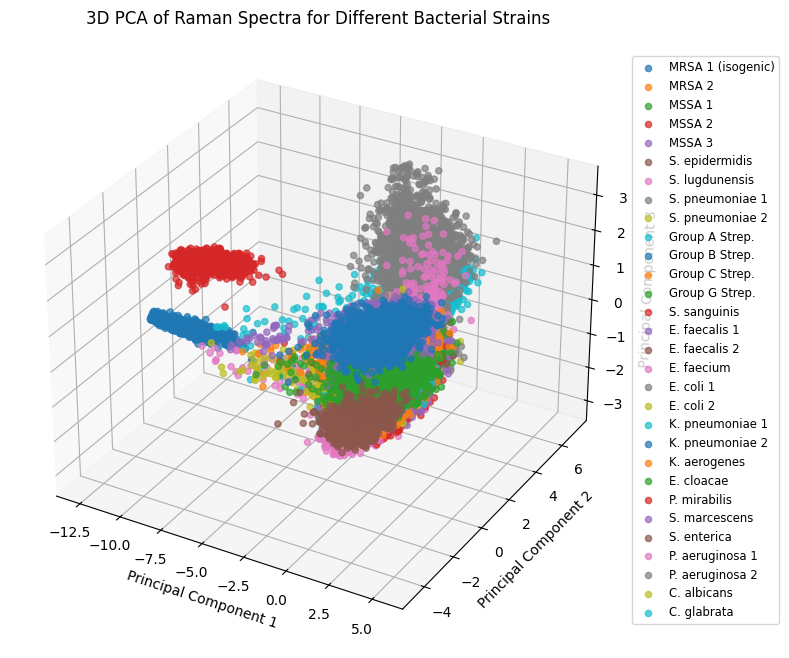

In [13]:
# Apply PCA to reduce dimensionality to 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Print PCA statistics
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
print(f"Explained variance by PC3: {explained_variance[2]:.2f}")

# Plotting the PCA results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with colors according to their bacterial strain
for i in range(len(STRAINS)):
    strain_index = ORDER[i]  # Get the strain index from the ORDER list
    strain_name = STRAINS[strain_index]  # Get the corresponding strain name
    indices = np.where(y == strain_index)
    
    ax.scatter(X_pca[indices, 0], X_pca[indices, 1], X_pca[indices, 2], label=strain_name, alpha=0.7)

# Adding labels, title, and legend
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Raman Spectra for Different Bacterial Strains')

# Adjusting legend to the right side of the plot
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.show()

In [14]:
# Define Gram-negative and Gram-positive groups based on the strain indices
gram_negative_indices = [3, 4, 8, 9, 10, 11, 19, 22]  # Example for Gram-negative
gram_positive_indices = [0, 1, 5, 6, 7, 14, 15, 16, 17, 18, 20, 21, 23, 24, 25, 26, 27, 28, 29]  # Example for Gram-positive

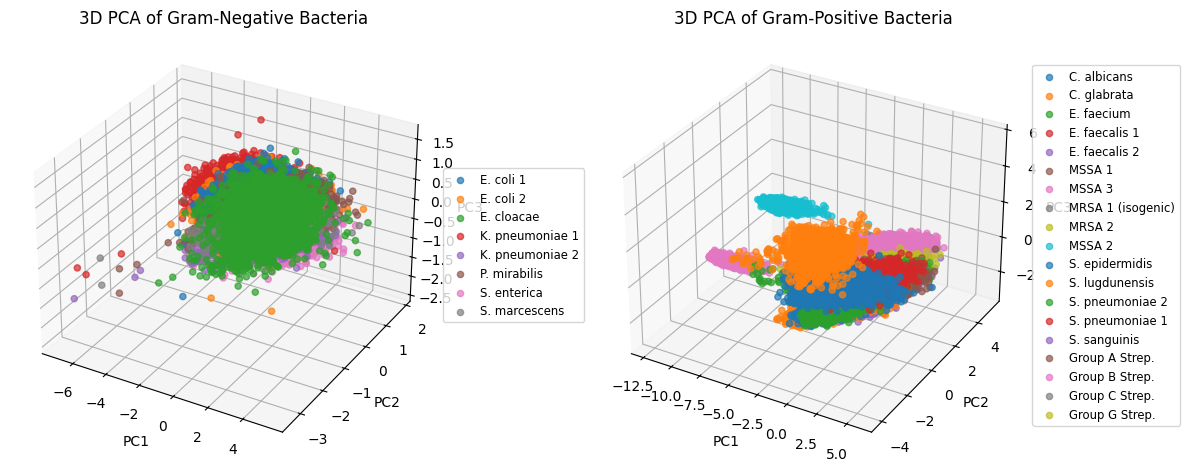

In [17]:
# Filter the dataset for Gram-negative
X_gram_negative = X[np.isin(y, gram_negative_indices)]
y_gram_negative = y[np.isin(y, gram_negative_indices)]

# Filter the dataset for Gram-positive
X_gram_positive = X[np.isin(y, gram_positive_indices)]
y_gram_positive = y[np.isin(y, gram_positive_indices)]



# Apply PCA to Gram-negative group
pca_negative = PCA(n_components=3)
X_pca_negative = pca_negative.fit_transform(X_gram_negative)

# Apply PCA to Gram-positive group
pca_positive = PCA(n_components=3)
X_pca_positive = pca_positive.fit_transform(X_gram_positive)

# Plotting the PCA results for Gram-negative group in 3D
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121, projection='3d')
for strain in gram_negative_indices:
    strain_name = STRAINS[strain]
    indices = np.where(y_gram_negative == strain)
    ax1.scatter(X_pca_negative[indices, 0], X_pca_negative[indices, 1], X_pca_negative[indices, 2], label=strain_name, alpha=0.7)

ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
ax1.set_title('3D PCA of Gram-Negative Bacteria')
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Plotting the PCA results for Gram-positive group in 3D
ax2 = fig.add_subplot(122, projection='3d')
for strain in gram_positive_indices:
    strain_name = STRAINS[strain]
    indices = np.where(y_gram_positive == strain)
    ax2.scatter(X_pca_positive[indices, 0], X_pca_positive[indices, 1], X_pca_positive[indices, 2], label=strain_name, alpha=0.7)

ax2.set_xlabel('PC1')
ax2.set_ylabel('PC2')
ax2.set_zlabel('PC3')
ax2.set_title('3D PCA of Gram-Positive Bacteria')
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

plt.tight_layout()
plt.show()

Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

  Strain 0.0       0.99      1.00      1.00       600
  Strain 1.0       1.00      1.00      1.00       600
  Strain 2.0       0.76      0.81      0.78       600
  Strain 3.0       0.84      0.86      0.85       600
  Strain 4.0       0.87      0.88      0.87       600
  Strain 5.0       0.99      0.98      0.99       600
  Strain 6.0       0.78      0.81      0.80       600
  Strain 7.0       0.78      0.78      0.78       600
  Strain 8.0       0.73      0.73      0.73       600
  Strain 9.0       0.95      0.95      0.95       600
 Strain 10.0       0.94      0.91      0.93       600
 Strain 11.0       0.93      0.92      0.92       600
 Strain 12.0       0.99      0.99      0.99       600
 Strain 13.0       0.99      0.99      0.99       600
 Strain 14.0       0.97      0.96      0.97       600
 Strain 15.0       0.93      0.92      0.92       600
 Strain 16.0       0.92      0.92      0.92

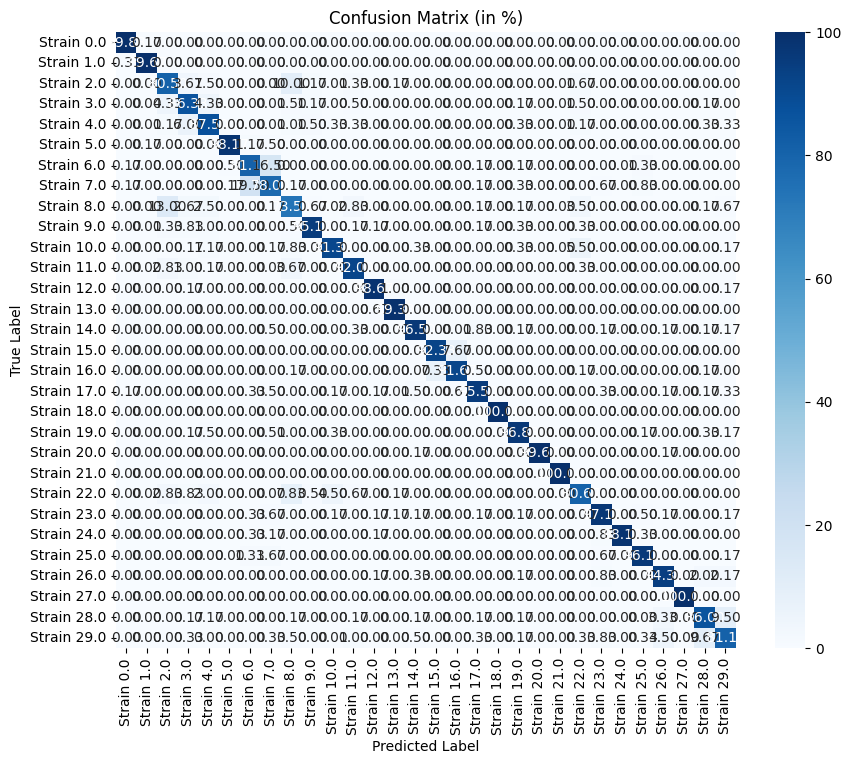

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the SVM model
svm_model = SVC(kernel='linear', C=1, random_state=42)  # You can also try 'rbf', 'poly', or other kernels
svm_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=[f'Strain {i}' for i in np.unique(y)]))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Convert confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix in percentages
plt.figure(figsize=(10, 8))
sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="Blues", xticklabels=[f'Strain {i}' for i in np.unique(y)], yticklabels=[f'Strain {i}' for i in np.unique(y)])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (in %)')
plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# Import the labels from the config.py file
from config import STRAINS



# Load your dataset
X_test = np.load('./data/X_2018clinical.npy')
y_test = np.load('./data/y_2018clinical.npy')

# Create a dictionary to store mean and standard deviation for each class
mean_spectra = {}
std_spectra = {}




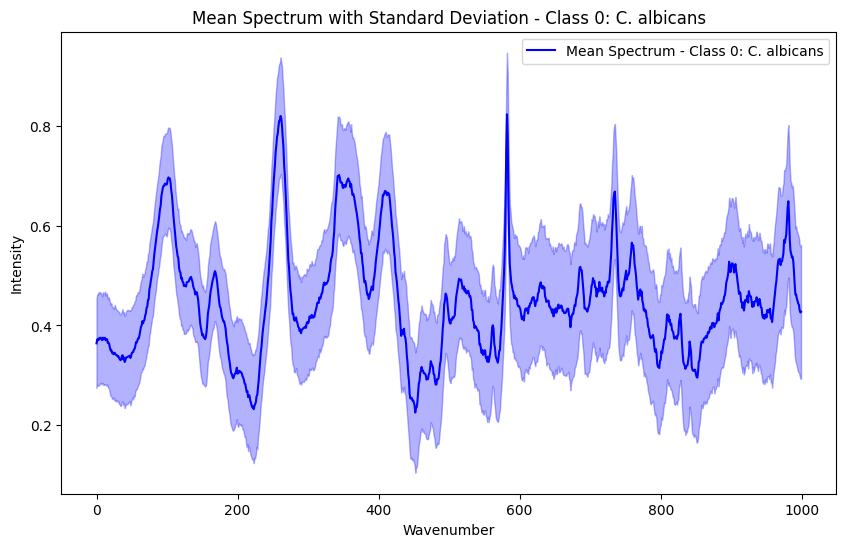

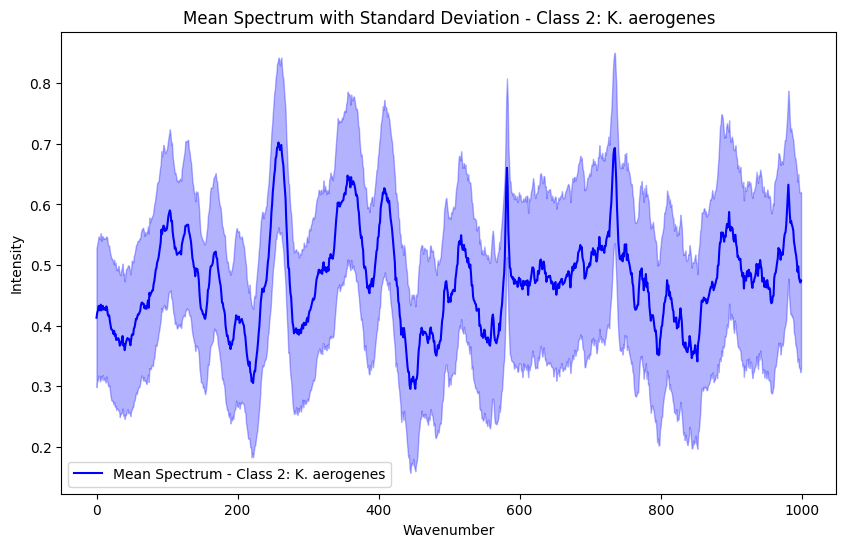

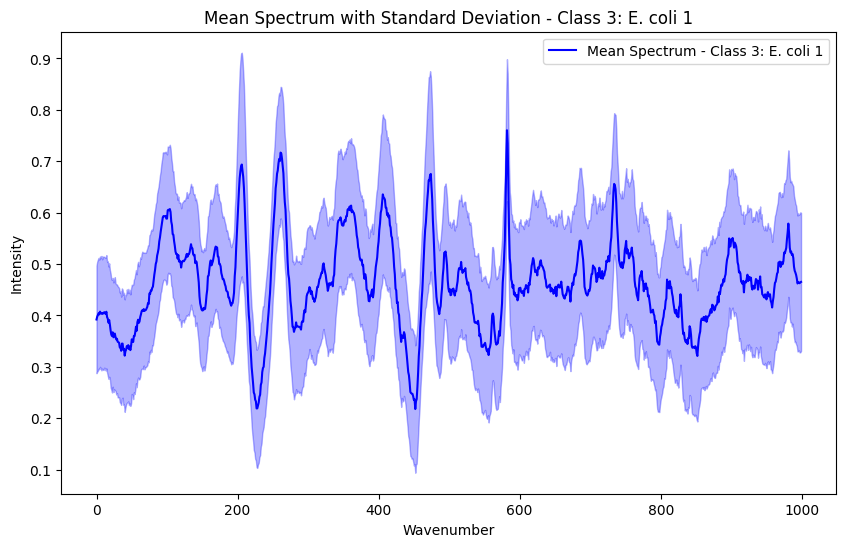

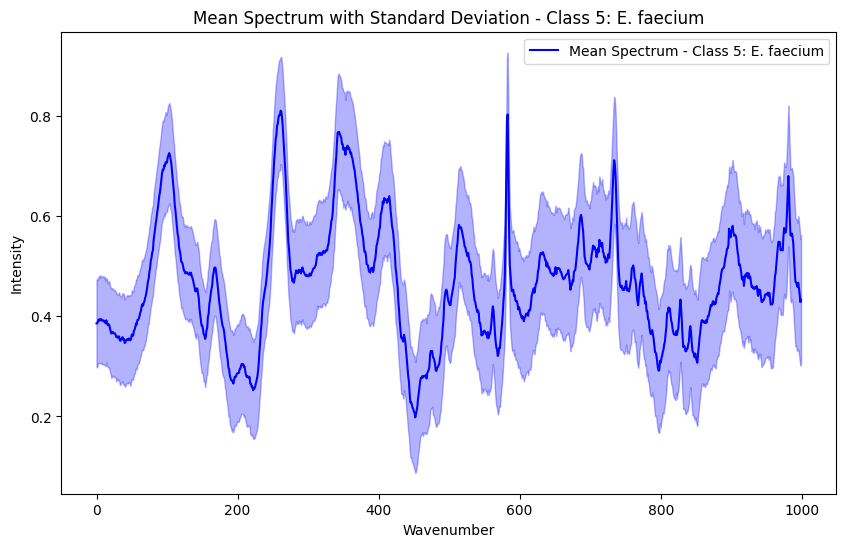

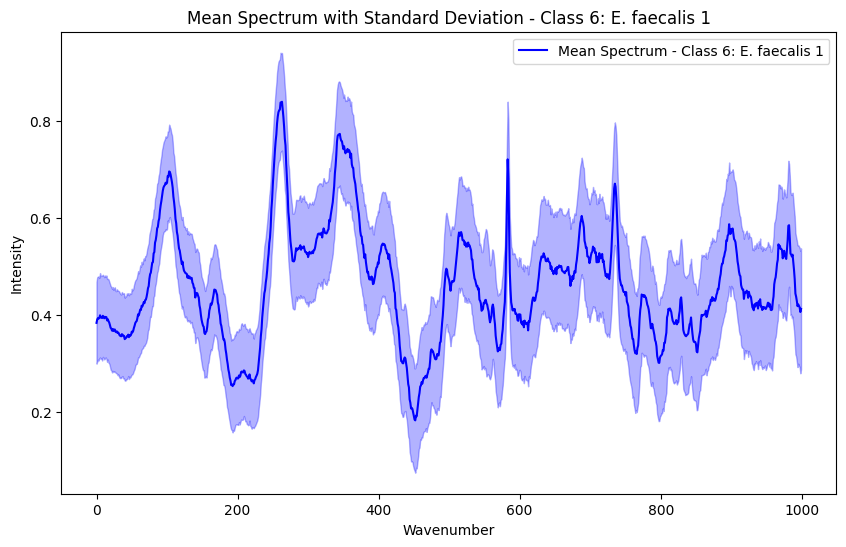

In [5]:
for label in np.unique(y_test):
    # Get all spectra for the current class
    spectra_for_class = X_test[y_test == label]
    
    # Calculate mean and standard deviation
    mean_spectra[label] = np.mean(spectra_for_class, axis=0)
    std_spectra[label] = np.std(spectra_for_class, axis=0)
    
    # Plotting each class separately
    plt.figure(figsize=(10, 6))
    
    mean_spectrum = mean_spectra[label]
    std_spectrum = std_spectra[label]
    
    # Get the strain name from the STRAINS dictionary
    class_name = STRAINS.get(int(label), f"Class {label}")
    
    plt.plot(mean_spectrum, label=f"Mean Spectrum - Class {int(label)}: {class_name}", color='blue')
    plt.fill_between(np.arange(len(mean_spectrum)), 
                     mean_spectrum - std_spectrum, 
                     mean_spectrum + std_spectrum, 
                     color='blue', alpha=0.3)
    
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Mean Spectrum with Standard Deviation - Class {int(label)}: {class_name}')
    plt.legend()
    plt.show()

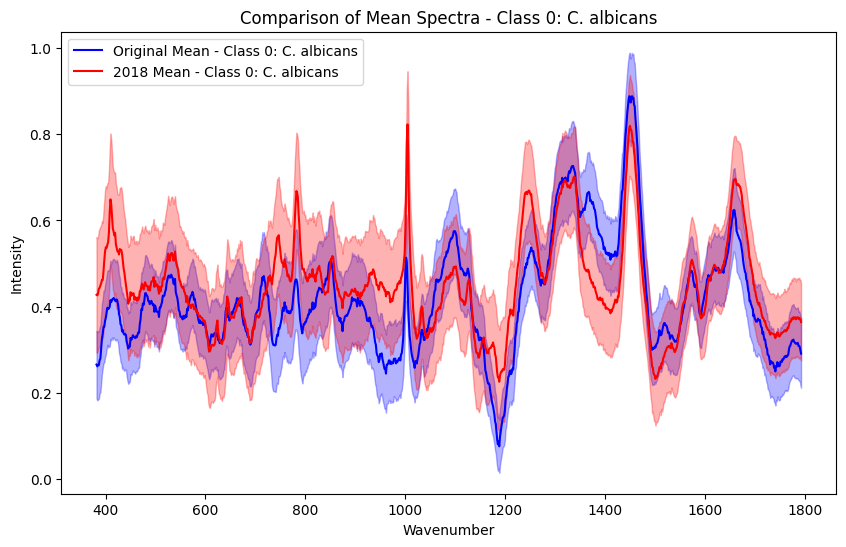

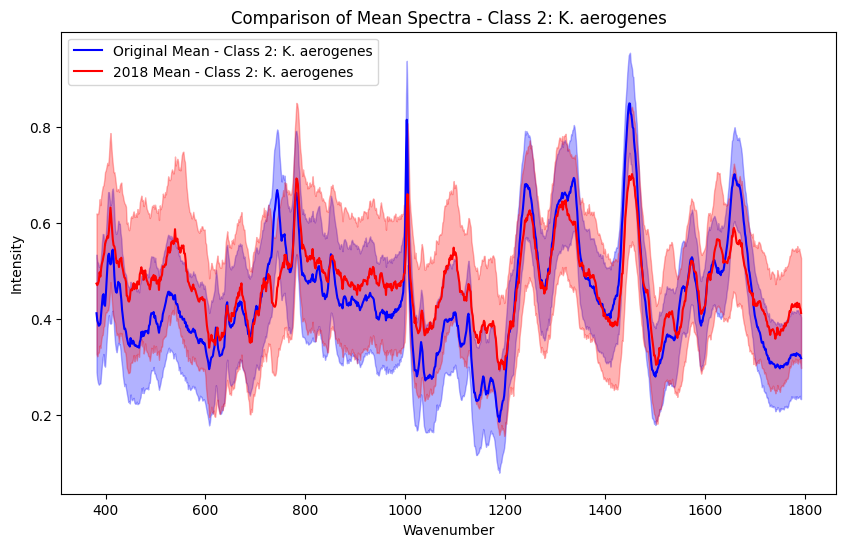

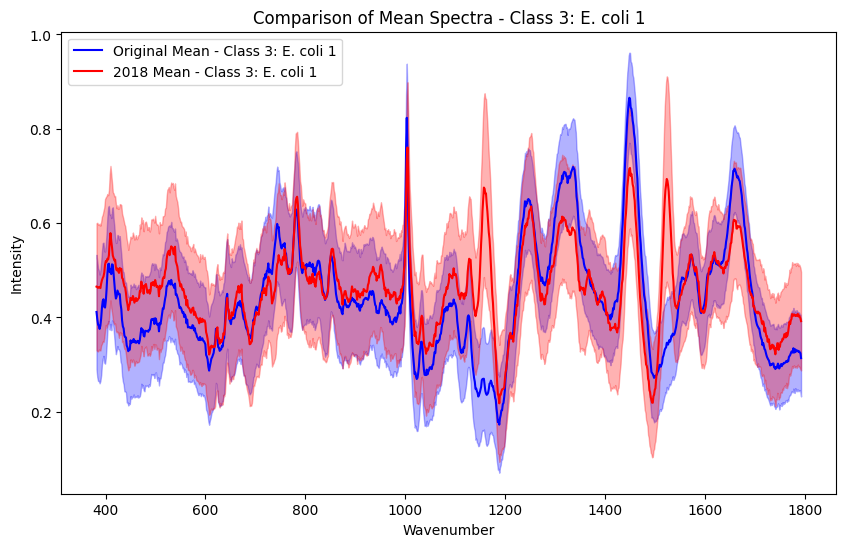

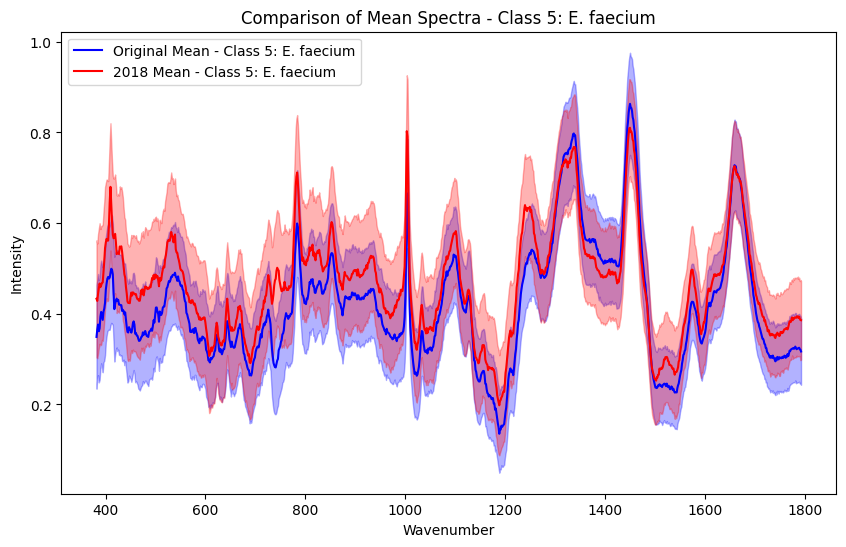

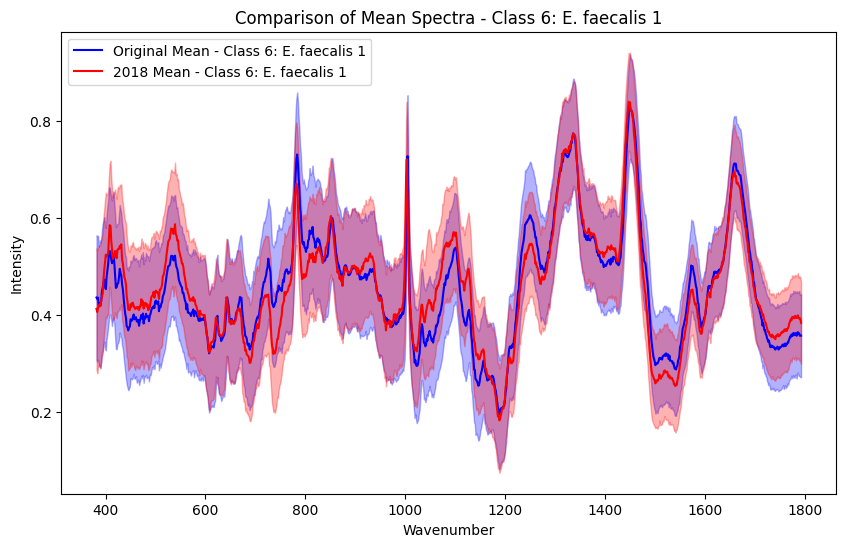

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from config import STRAINS  # Assuming the STRAINS dictionary is in config.py

# Load your original and 2018 datasets
X_original = np.load('./data/X_reference.npy')
y_original = np.load('./data/y_reference.npy')

X_test = np.load('./data/X_2018clinical.npy')
y_test = np.load('./data/y_2018clinical.npy')

# Load the wavenumbers
wavenumbers = np.load('./data/wavenumbers.npy')

# Function to calculate mean and standard deviation
def calculate_mean_std(X, y, label):
    spectra_for_class = X[y == label]
    mean_spectrum = np.mean(spectra_for_class, axis=0)
    std_spectrum = np.std(spectra_for_class, axis=0)
    return mean_spectrum, std_spectrum

# Iterate over each label in the 2018 dataset
for label in np.unique(y_test):
    # Calculate mean and standard deviation for the label in both datasets
    mean_original, std_original = calculate_mean_std(X_original, y_original, label)
    mean_test, std_test = calculate_mean_std(X_test, y_test, label)
    
    # Plotting the comparison
    plt.figure(figsize=(10, 6))
    
    class_name = STRAINS.get(int(label), f"Class {label}")
    
    # Plot original dataset mean with std
    plt.plot(wavenumbers, mean_original, label=f"Original Mean - Class {int(label)}: {class_name}", color='blue')
    plt.fill_between(wavenumbers, 
                     mean_original - std_original, 
                     mean_original + std_original, 
                     color='blue', alpha=0.3)
    
    # Plot 2018 dataset mean with std
    plt.plot(wavenumbers, mean_test, label=f"2018 Mean - Class {int(label)}: {class_name}", color='red')
    plt.fill_between(wavenumbers, 
                     mean_test - std_test, 
                     mean_test + std_test, 
                     color='red', alpha=0.3)
    
    plt.xlabel('Wavenumber')
    plt.ylabel('Intensity')
    plt.title(f'Comparison of Mean Spectra - Class {int(label)}: {class_name}')
    plt.legend()
    plt.show()
